## File to filter footprints for Pittsburgh
Jameson Carter

purpose: To make the file containing footprints of buildings much smaller

input: Allegheny_County_Building_Footprint_Locations.geojson
       sourced from:
       https://openac-alcogis.opendata.arcgis.com/datasets/AlCoGIS::allegheny-county-building-footprint-locations/explore?filters=eyJDTEFTUyI6WyJSIl19&location=40.462063%2C-79.916146%2C16.82
       and city of Pittsburgh 2010 census tract boundaries: https://data.wprdc.org/dataset/2010-census-tracts 
       
output: Pittsburgh_Building_Footprint_Locations.shp (shape files are generally smaller)

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [4]:

footprint = gpd.read_file('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/Allegheny_County_Building_Footprint_Locations.geojson')


In [5]:
pittsburgh = gpd.read_file('C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/input_data/spatial_data/2010_Census_Tracts.shp')
pittsburgh


,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,tractce10_,cnt_tractc,sum_lowmod,sum_lowm_1,lowmodperc,lowmodpe_1,cdbg2018,Shape__Are,Shape__Len,geometry
0,1,42,003,040500,1,420030405001,Block Group 1,G5030,S,268195,...,040500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,42,003,040400,1,420030404001,Block Group 1,G5030,S,75472,...,040400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123,"POLYGON ((-79.94727 40.44703, -79.94716 40.446..."
2,3,42,003,040200,2,420030402002,Block Group 2,G5030,S,282679,...,040200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,42,003,030500,2,420030305002,Block Group 2,G5030,S,284548,...,030500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,42,003,980000,1,420039800001,Block Group 1,G5030,S,637235,...,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089,"POLYGON ((-79.88460 40.49066, -79.88451 40.486..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,42,003,270100,2,420032701002,Block Group 2,G5030,S,604710,...,270100,2,945,2475,38.181818,38.18,No,1.107355e+07,14197.343518,"POLYGON ((-80.03882 40.48725, -80.03805 40.487..."
134,135,42,003,980900,1,420039809001,Block Group 1,G5030,S,1453388,...,980900,2,0,0,0.000000,0,No,1.564899e+07,29884.799775,"MULTIPOLYGON (((-80.03668 40.47004, -80.03649 ..."
135,136,42,003,250700,1,420032507001,Block Group 1,G5030,S,560320,...,250700,1,555,765,72.549020,72.54,Yes,6.050817e+06,11709.518764,"POLYGON ((-80.02039 40.46285, -80.02022 40.462..."
136,137,42,003,270400,1,420032704001,Block Group 1,G5030,S,395541,...,270400,1,675,1035,65.217391,65.21,Yes,4.256393e+06,9062.212499,"POLYGON ((-80.02675 40.46778, -80.02665 40.467..."


In [6]:
# Verify that CRS is equivalent
footprint.crs == pittsburgh.crs

True

In [7]:
# Now merge the two, evaluate merge between non-residential buildings and food assets
pittsburgh_footprint = footprint.sjoin(pittsburgh, how="inner", predicate='intersects')
pittsburgh_footprint

,OBJECTID,status,prev_area,pct_change,CLASS,LUC,FEATURECODE,ShapeSTArea,ShapeSTLength,geometry,...,objectid_1,tractce10_,cnt_tractc,sum_lowmod,sum_lowm_1,lowmodperc,lowmodpe_1,cdbg2018,Shape__Are,Shape__Len
30356,30357,existing,0.0,0.0,C,480,220.0,3327.113159,235.679307,"POLYGON ((-80.01230 40.38309, -80.01227 40.383...",...,75,191800,7,1950,5260,37.072243,37.07,No,1.564517e+07,23650.358220
32745,32746,existing,0.0,0.0,R,10,210.0,894.295807,141.440947,"POLYGON ((-80.01382 40.38638, -80.01378 40.386...",...,75,191800,7,1950,5260,37.072243,37.07,No,1.564517e+07,23650.358220
52205,52206,existing,0.0,0.0,R,10,210.0,1691.813782,184.622744,"POLYGON ((-80.01309 40.38253, -80.01299 40.382...",...,75,191800,7,1950,5260,37.072243,37.07,No,1.564517e+07,23650.358220
104247,104248,existing,0.0,0.0,R,10,250.0,1468.409760,174.336765,"POLYGON ((-80.01399 40.38554, -80.01408 40.385...",...,75,191800,7,1950,5260,37.072243,37.07,No,1.564517e+07,23650.358220
108080,108081,existing,0.0,0.0,R,10,250.0,1545.470551,177.040457,"POLYGON ((-80.00736 40.38204, -80.00734 40.382...",...,75,191800,7,1950,5260,37.072243,37.07,No,1.564517e+07,23650.358220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567339,567340,existing,0.0,0.0,G,660,NaN,348.586243,84.663145,"POLYGON ((-79.91503 40.43021, -79.91504 40.430...",...,127,980300,1,0,0,0.000000,0,No,1.404050e+07,18179.243394
568072,568073,existing,0.0,0.0,R,10,250.0,1799.898376,175.911675,"POLYGON ((-79.91190 40.43303, -79.91188 40.433...",...,127,980300,1,0,0,0.000000,0,No,1.404050e+07,18179.243394
569909,569910,existing,0.0,0.0,G,660,250.0,1759.203918,264.463667,"POLYGON ((-79.91355 40.42945, -79.91355 40.429...",...,127,980300,1,0,0,0.000000,0,No,1.404050e+07,18179.243394
571012,571013,existing,0.0,0.0,R,100,250.0,1338.227112,163.217725,"POLYGON ((-79.91393 40.43209, -79.91376 40.432...",...,127,980300,1,0,0,0.000000,0,No,1.404050e+07,18179.243394


<AxesSubplot:>

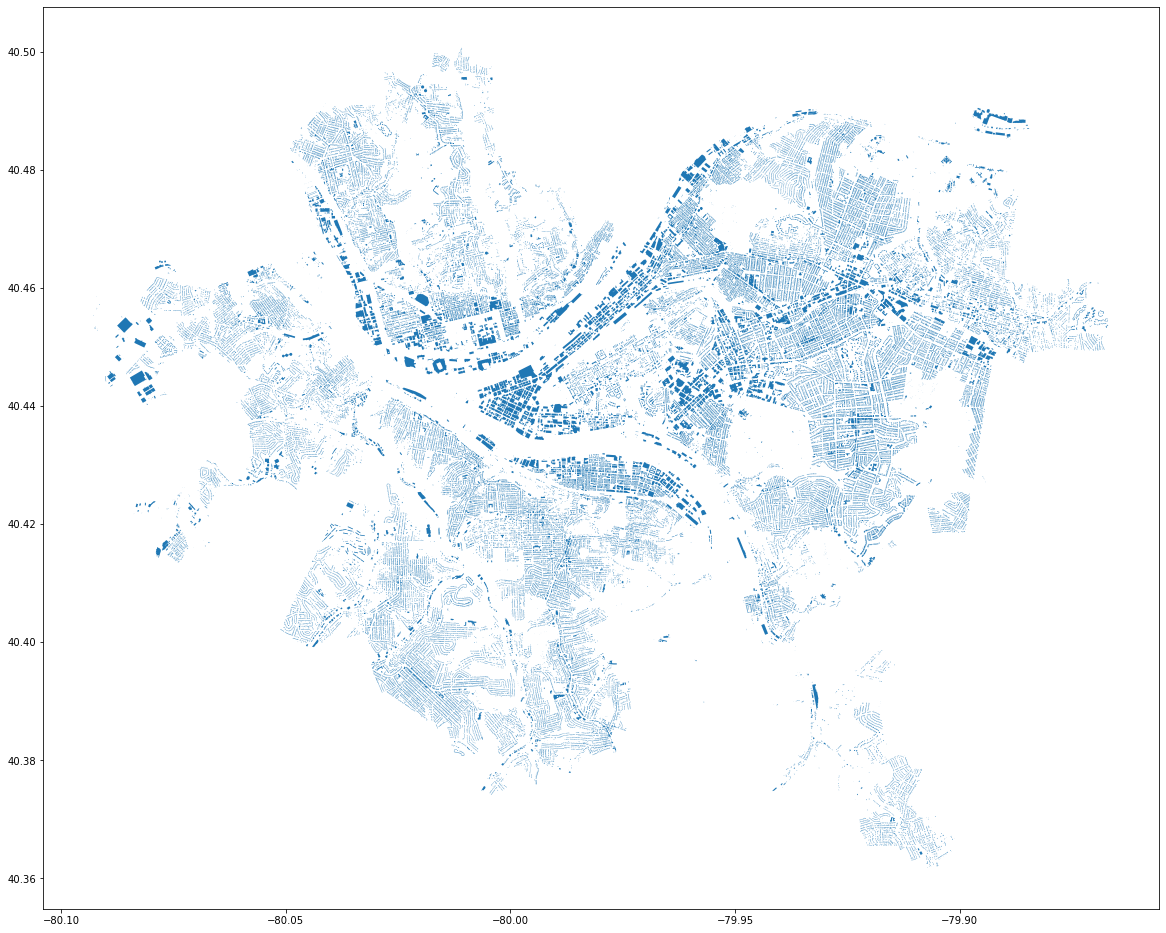

In [8]:
plt.rcParams["figure.figsize"]=20,20
pittsburgh_footprint.plot()

In [9]:
# Output as a shape file
pittsburgh_footprint.to_file("C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/processed_data/pittsburgh_footprint.shp")

C:\Users\jacar\AppData\Roaming\Python\Python38\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
<ipython-input-9-fad58275b34e>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pittsburgh_footprint.to_file("C:/Users/jacar/OneDrive/Documents/GitHub/Food-Access/processed_data/pittsburgh_footprint.shp")
